
# <span style="color:rgb(213,80,0)">Thermal Behavior of a Lithium\-ion Cell</span>

Modeling the temperature rise of a Li\-ion cell by considering two coupled temperatures: the **core temperature** (T\_core​) and the **surface temperature** (T\_surf​). This is a common simplification of the full 3D heat equation used for control systems.


The governing equations are:

1.   **Core Temperature Rate** $\frac{{d\;T}_{\mathrm{core}} }{\mathrm{dt}}$ **:**

$$\frac{{\mathrm{dT}}_{\mathrm{core}} }{\mathrm{dt}}=\frac{1}{m_{cell} {\;c}_{p,cell} }\left(Q_{\mathrm{gen}} -h_{\mathrm{core}} \left(T_{\mathrm{core}} -T_{\mathrm{surf}} \right)\right)$$




&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.  **Surface Temperature Rate** $\frac{{d\;T}_{\mathrm{surf}} }{\mathrm{dt}}$ **:**


$$\frac{{\mathrm{dT}}_{\mathrm{surf}} }{\mathrm{dt}}=\frac{1}{m_{cell} {\;c}_{p,cell} }\left(h_{\mathrm{core}} \left(T_{\mathrm{core}} -T_{\mathrm{surf}} \right)-h_{\mathrm{amb}} \left(T_{\mathrm{surf}} -T_{\mathrm{amb}} \right)\right)$$

| Variable <br>  | Description <br>  | Value <br>  | Unit <br>   |
| :-- | :-- | :-- | :-- |
| $T_{\mathrm{core}}$, $T_{\mathrm{surf}}$ <br>  | Core, Surface Temperature <br>  | Dependent <br>  | K <br>   |
| $\displaystyle T_{\mathrm{amb}}$ <br>  | Ambient Temperature <br>  | 298.15 <br>  | K <br>   |
| $\displaystyle m_{cell} {\;c}_{p,cell}$ <br>  | Cell Heat Capacity <br>  | 20 <br>  | J/K <br>   |
| $\displaystyle h_{\mathrm{core}}$ <br>  | Internal Heat Transfer Coefficient <br>  | 1 <br>  | W/K <br>   |
| $\displaystyle h_{\mathrm{amb}}$ <br>  | Ambient Heat Transfer Coefficient <br>  | 0.5 <br>  | W/K <br>   |
| $\displaystyle Q_{\mathrm{gen}}$ <br>  | Heat Generation Rate (Power) <br>  | See formula <br>  | W <br>   |


The heat generation term, $Q_{\mathrm{gen}}$ ​, is non\-linear and current\-dependent:


$$Q_{\mathrm{gen}} =I^2 R_{\int } +{I\;T}_{\mathrm{core}\;} \frac{dE}{dT}$$

Where:

-  I: Applied current (e.g., constant 10 A discharge).
-  Rint​: Cell internal resistance (0.01 Ω).
-  dEdT​: Entropic coefficient (e.g., −2×10−4 V/K).

**Initial Conditions:**

-  Tcore​(0)=298.15 K (Initial ambient temperature)
-  Tsurf​(0)=298.15 K

**Time Span:** t∈\[0,3600\] seconds (1 hour).



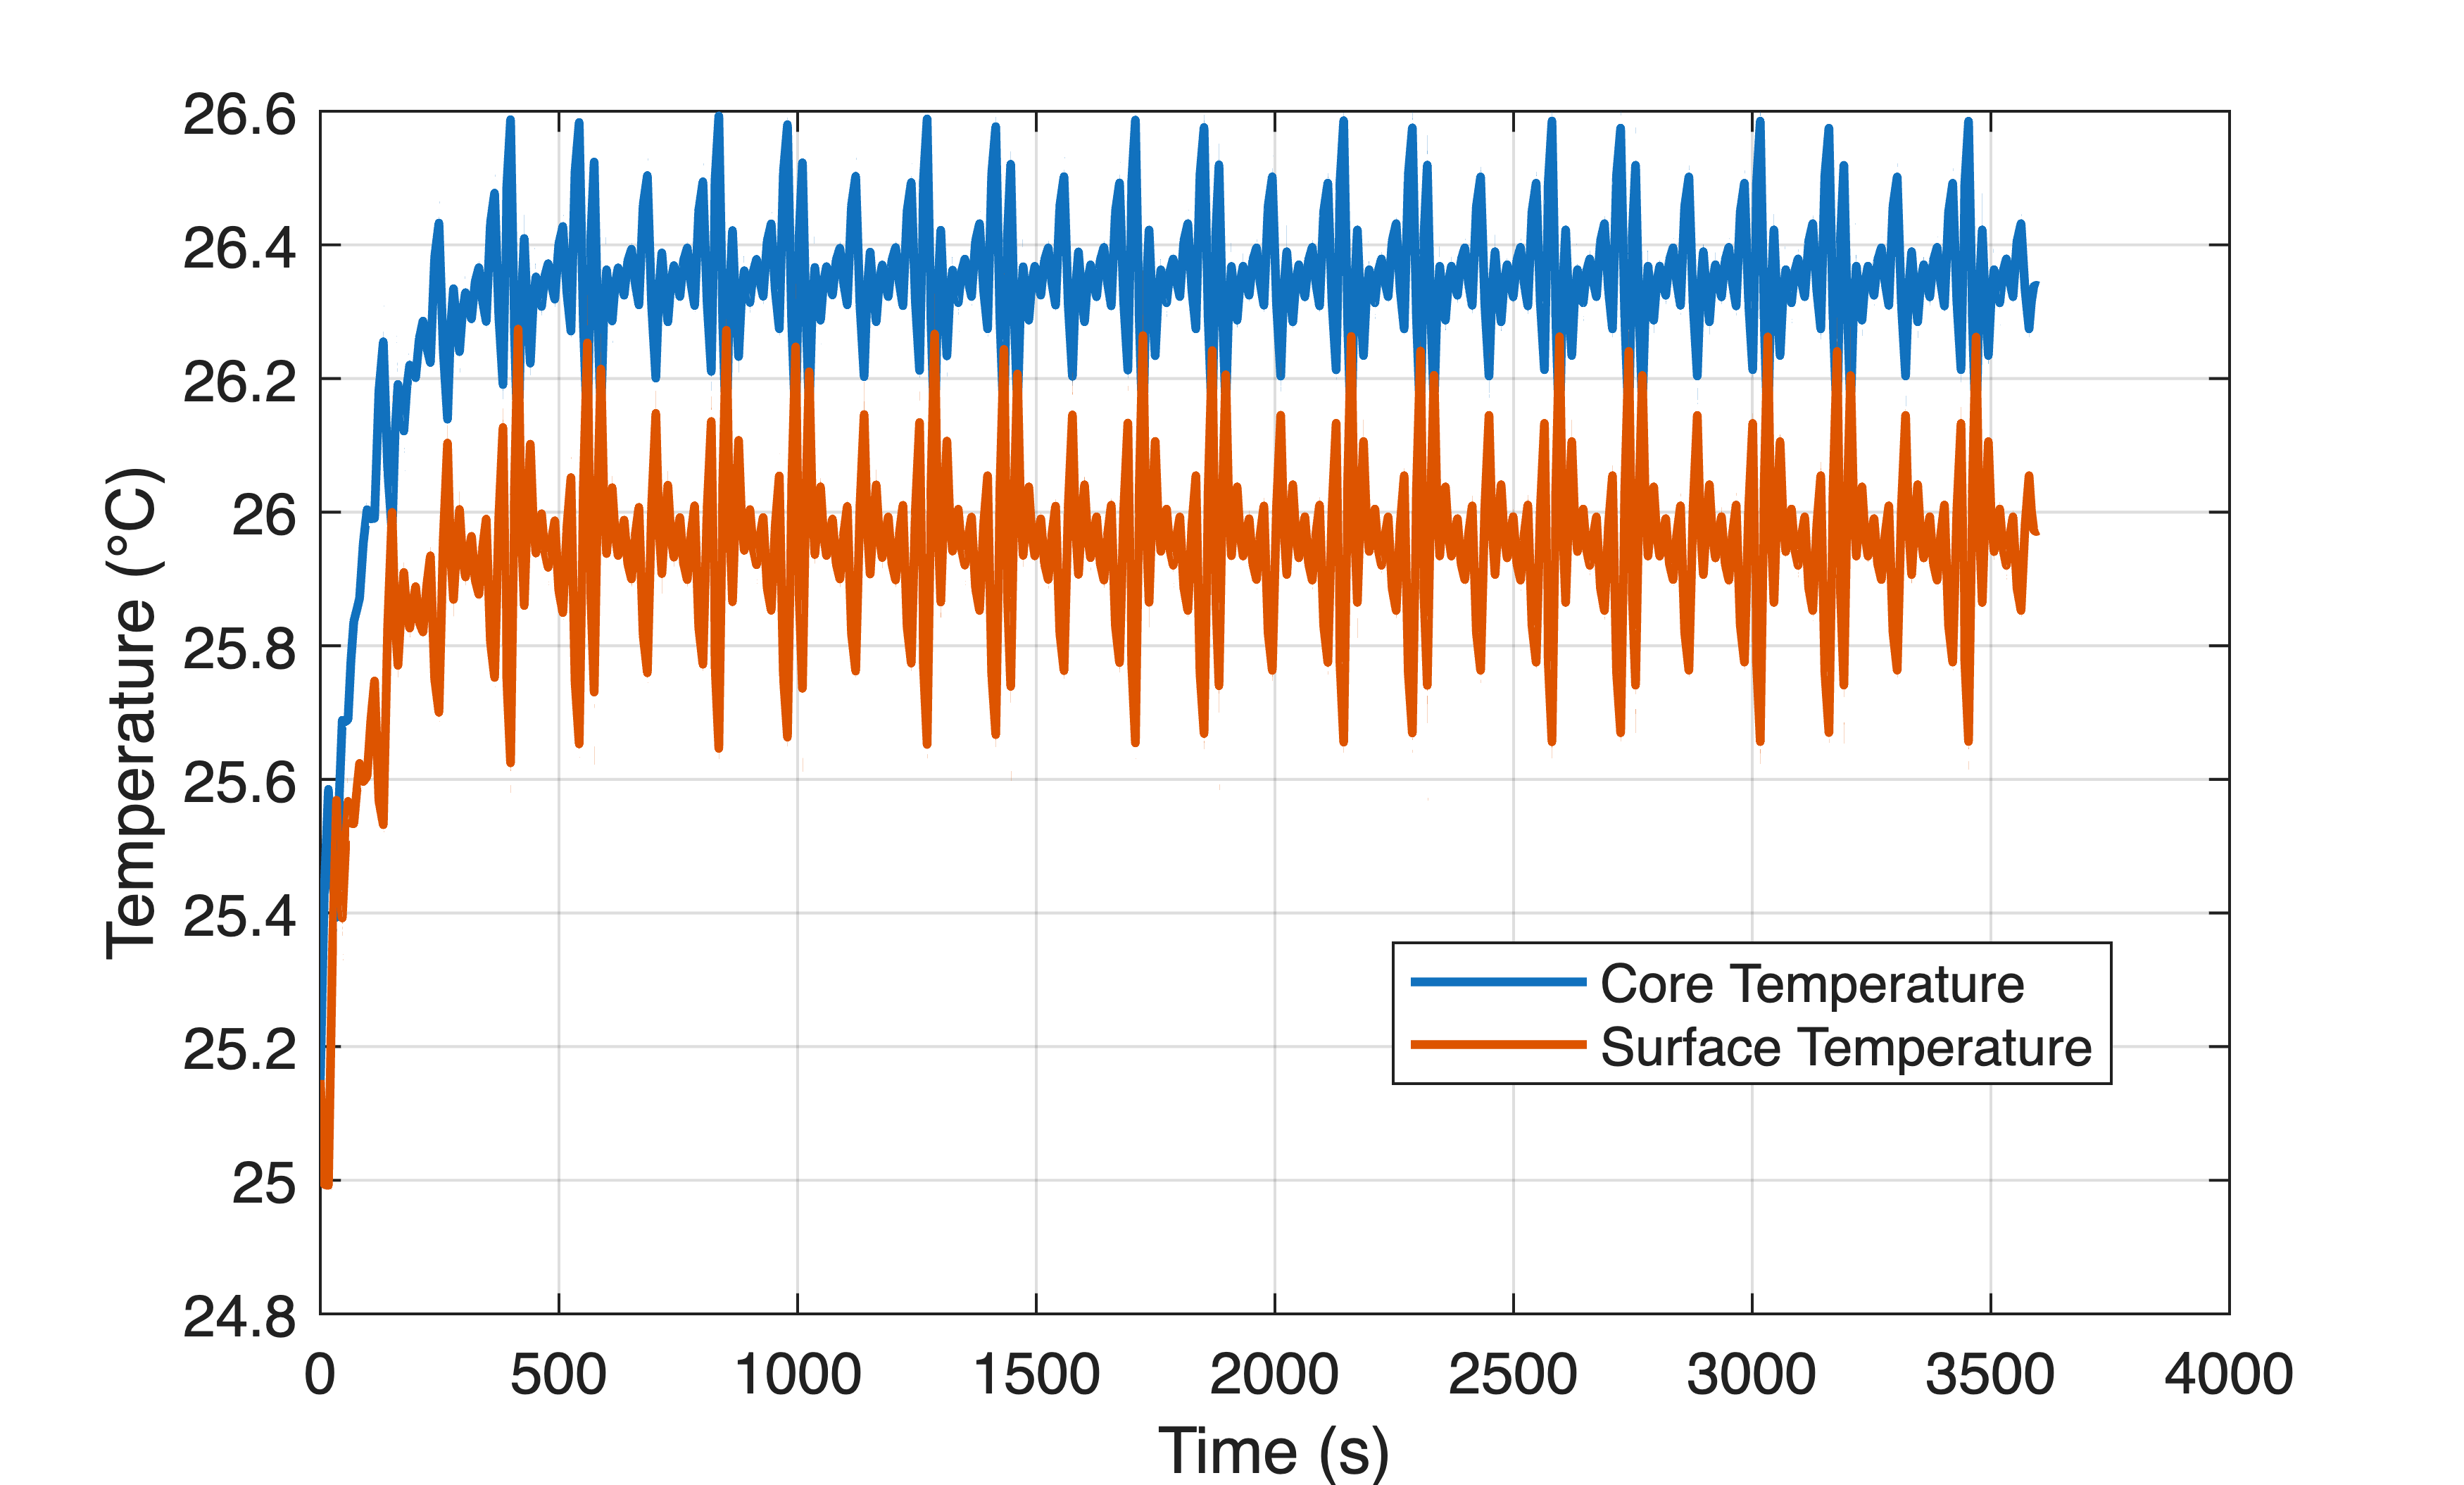

In [1]:
clc;  clearvars; close all;

I = 10;
R = 0.01;
dEdT = -2*10^(-4);
hc = 1;
ha = 0.5;
Tamb = 298.15;
mc = 20;

tspan = [0 3600];
T0 = [298.15 298.15];

function dTdt = f(t,T,hc,ha,mc,I,R,dEdT,Tamb)
    dTdt = [1/mc*((I^2*R + I*T(1)*dEdT)-hc*(T(1)-T(2)));1/mc*(hc*(T(1)-T(2))- ha*(T(2)-Tamb))];
end

[t,T] = ode45(@(t,T) f(t,T,hc,ha,mc,I,R,dEdT,Tamb), tspan, T0);

T_core = T(1) - 273;
T_surf = T - 273;

plot(t,T_core,t,T_surf, "LineWidth",1.5);
legend("Core Temperature", "Surface Temperature", "Location","best")
xlabel('Time (s)');
ylabel('Temperature (°C)');
grid on;